<a href="https://colab.research.google.com/github/KattaLasya/AIML-2025/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question number 13
Prediction of bike rentals and sharing
1. Identify the top 5 days when rentals are most
2. Predict the holidays when bike sharing was most
3. Top 5 reasons for bike sharing or rentals
4. Name the weather condition most suitable for bike rentals
5. Identify the hourly illustration of bike rentals and sharing the most

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
day_data = pd.read_csv("/content/day.csv")
hour_data = pd.read_csv("/content/hour.csv")

In [21]:
#1.Identify the top 5 days when rentals are most
top_5_days = day_data.nlargest(5, 'cnt')[['dteday', 'cnt']]
print("Top 5 Days with Most Rentals:")
print(top_5_days)

Top 5 Days with Most Rentals:
         dteday   cnt
623  2012-09-15  8714
637  2012-09-29  8555
630  2012-09-22  8395
447  2012-03-23  8362
504  2012-05-19  8294


In [22]:
#2. Predict the holidays when bike sharing was most
holiday_rentals = day_data[day_data['holiday'] == 1].nlargest(5, 'cnt')[['dteday', 'cnt']]
print("\nTop 5 Holidays with Most Rentals:")
print(holiday_rentals)


Top 5 Holidays with Most Rentals:
         dteday   cnt
550  2012-07-04  7403
471  2012-04-16  6370
681  2012-11-12  6269
184  2011-07-04  6043
513  2012-05-28  6043


In [23]:
#3.Top 5 reasons for bike sharing or rentals
correlations = day_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'workingday']].corr()
reasons = correlations['cnt'].abs().sort_values(ascending=False)[1:6]
print("\nTop 5 Reasons for Bike Rentals (Correlation):")
print(reasons)


Top 5 Reasons for Bike Rentals (Correlation):
atemp         0.631066
temp          0.627494
windspeed     0.234545
hum           0.100659
workingday    0.061156
Name: cnt, dtype: float64


In [24]:
#4.Name the weather condition most suitable for bike rentals
weather_avg = day_data.groupby('weathersit')['cnt'].mean()
best_weather = weather_avg.idxmax()
print("\nWeather Condition Most Suitable for Rentals:")
print(f"Weather Situation {best_weather} with average rentals of {weather_avg[best_weather]:.2f}")


Weather Condition Most Suitable for Rentals:
Weather Situation 1 with average rentals of 4876.79


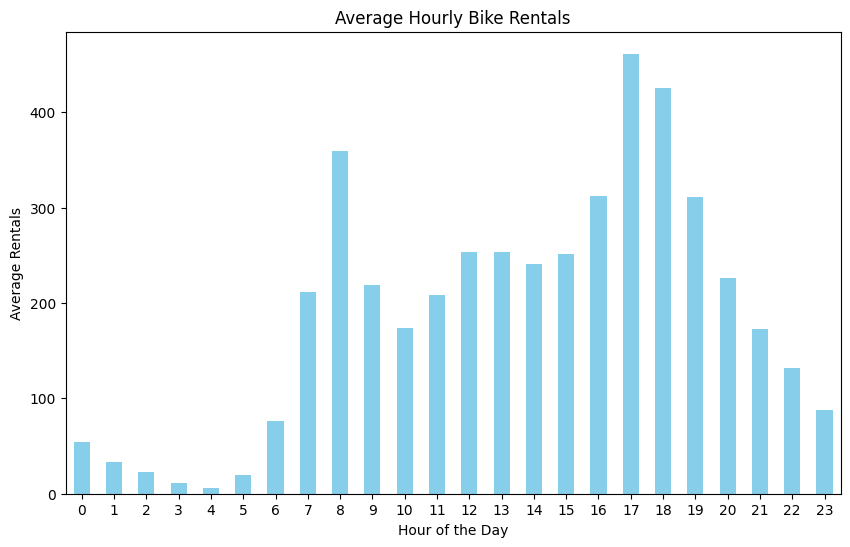

In [25]:
#5. Identify the hourly illustration of bike rentals and sharing the most
hourly_trend = hour_data.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 6))
hourly_trend.plot(kind='bar', color='skyblue')
plt.title('Average Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.show()